<a href="https://colab.research.google.com/github/miguelayllon/idal_ia3_uv/blob/main/ML_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

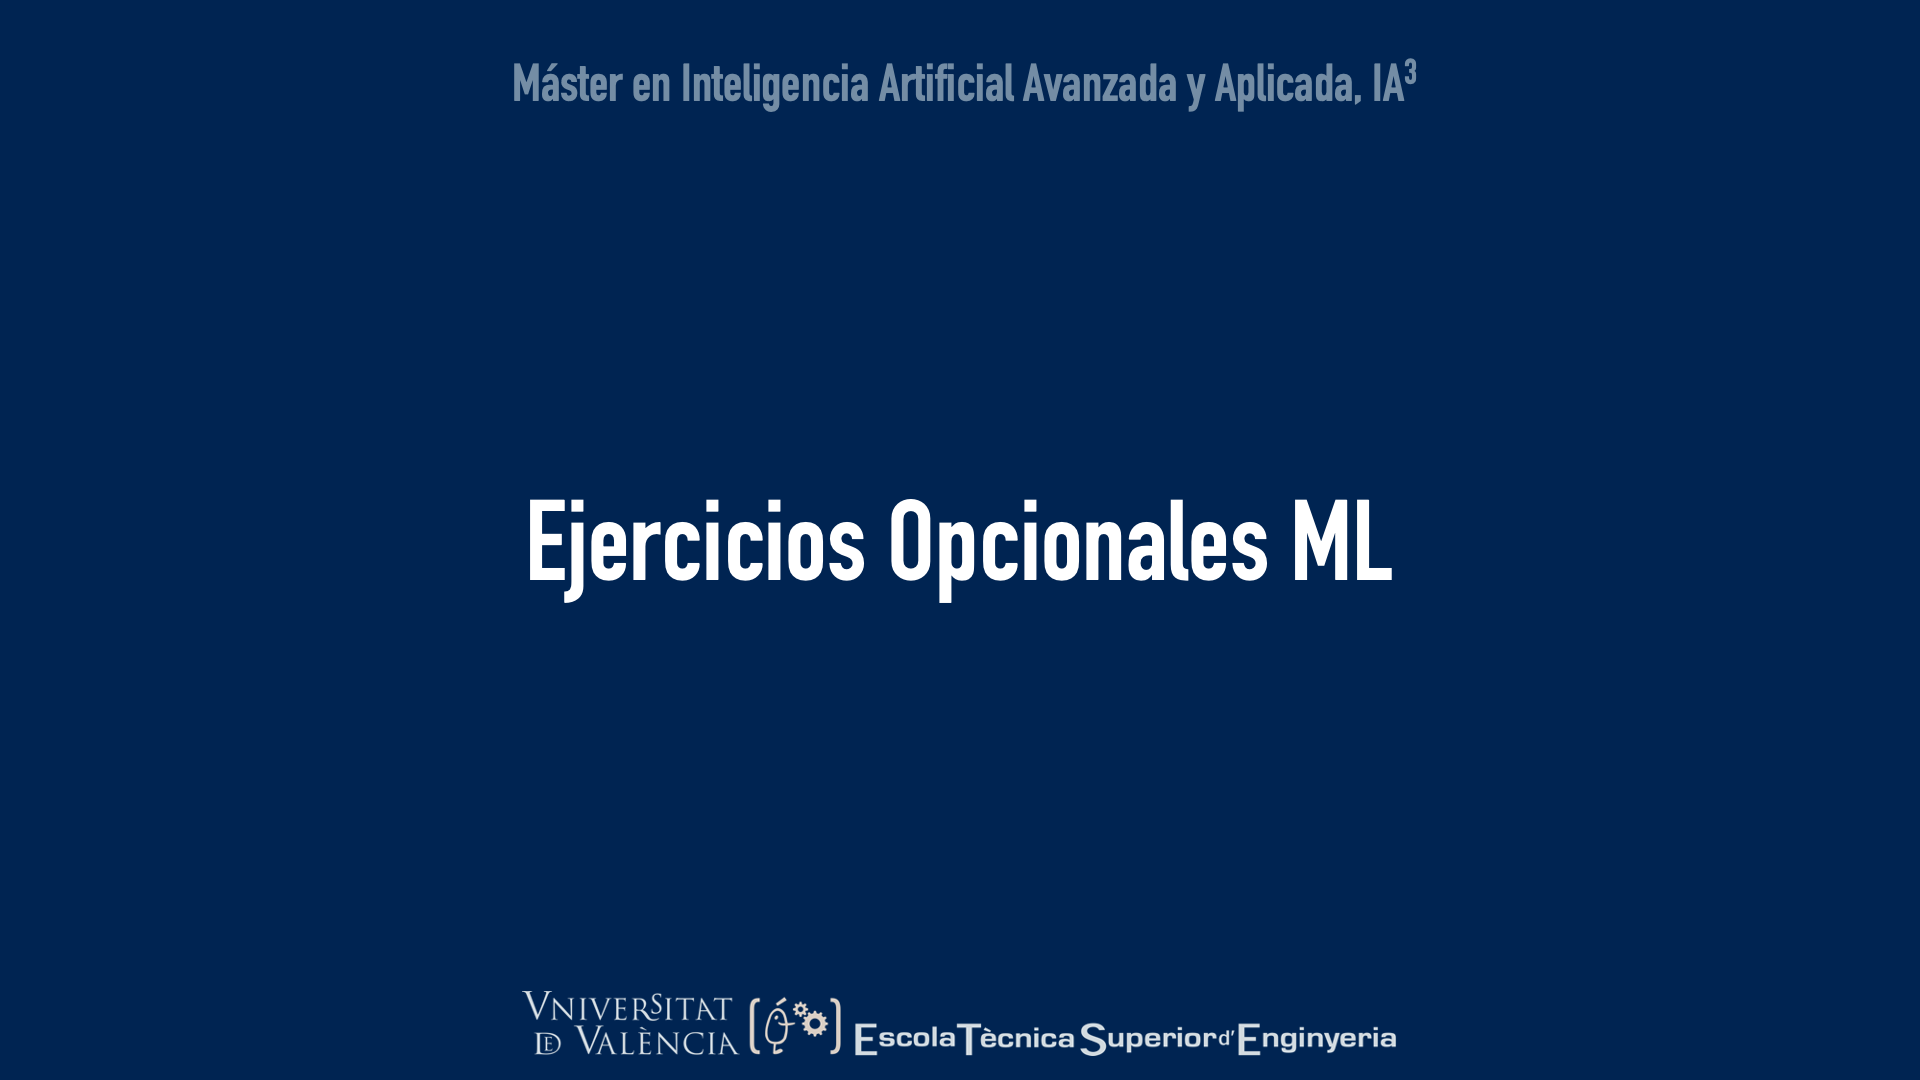

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

**Exercise 1 : ML**

**Teacher:** Cuadra Alconero, Javier 

**Group:** Roblox Team

**Students:** 
1.   Aparicio, Jose Javier
2.   Ayllón Samaniego, Miguel Angel
3.   Bas Abad, Vicente Jesús

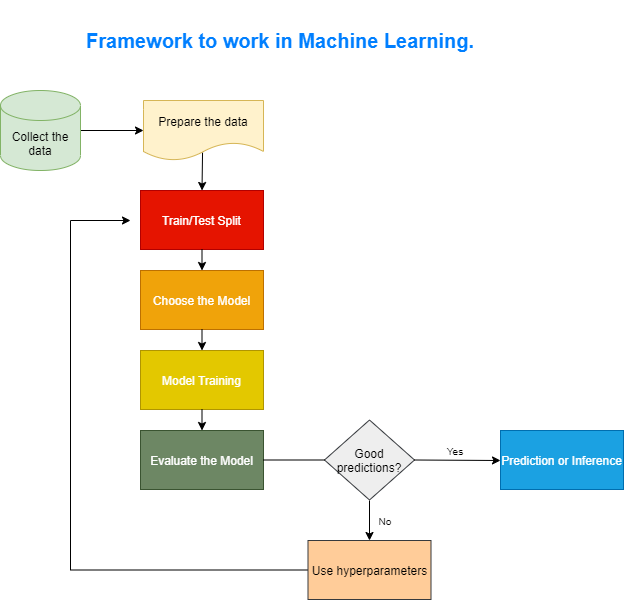

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the penguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [309]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [310]:
#Collect the data
df_penguis = sns.load_dataset("penguins")

In [311]:
#Prepare the data
df_penguis.dropna(inplace =True)
df_penguis.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [312]:
df_penguis['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [313]:
numeric = df_penguis.select_dtypes('number')
X = df_penguis.iloc[:,:-1]
X_dummies = pd.get_dummies(X)
Y= df_penguis['sex']

In [314]:
# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(X_dummies,Y)

In [315]:
#Choose the Model
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
#Evaluate the Model
logisticRegr.score(x_test, y_test)

0.7976190476190477

In [317]:
logisticRegr.score(x_train, y_train)

0.8433734939759037

There is a difference between the Train (0.8433734939759037) and the Test (0.7976190476190477). Which indicates that the Test still has the capacity for improvement. This difference is a clear symptom of overfiting. The algorithm does not work very well on the Train set but it loses performance in the Test. To fight against overfiting we can work with hyperparameters.

In [318]:
# Train/Test Split (Making Adjustments) and Use hyperparameters
x_train, x_test, y_train, y_test = train_test_split(X_dummies, Y, test_size=0.30, random_state=0)

In [319]:
#Choose the Model
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [320]:
#Evaluate the Model
logisticRegr.score(x_test, y_test)

0.82

In [321]:
logisticRegr.score(x_train, y_train)

0.8369098712446352

**Prediction or Inference**
The model has a learning level of **82%** with the adjustment of the hyperparameters.

**Another example**
Performing an evaluation between the **body_mass_g** variable and the new **male** variable

In [322]:
# Performing an evaluation between the variable weight and the sex of the penguins
df_penguis['male'] = (df_penguis['sex'] == 'Male').astype(int)
df_penguis['body_mass_g'] = df_penguis['body_mass_g'] /1000
X1 = df_penguis['body_mass_g'].to_numpy()
X1 = X1.reshape(-1,1)
y1 = df_penguis['male'].to_numpy()

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X1,y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
#import matplotlib.pyplot as plt
%matplotlib inline
X_new = np.linspace(0, 7, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

#The second column y_proba[:, 1] is the probability that the output is one, or 𝑝(𝑥).
#decision_boundary
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

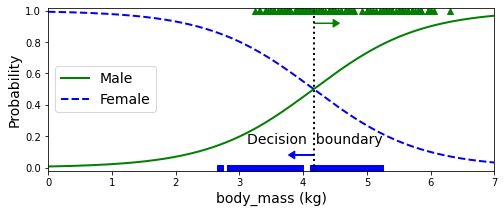

In [324]:
plt.figure(figsize=(8, 3))
plt.plot(X1[y1==0], y1[y1==0], "bs")
plt.plot(X1[y1==1], y1[y1==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Male")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Female")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("body_mass (kg)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, -0.02, 1.02])
plt.show()

In [325]:
#If the penguin weighs more than 4.16916917 kg, there is a 50% or more probability that it is male
decision_boundary

array([4.16916917])

In [326]:
#For weight values ​​less than decision_boundary(4.16916917 kg) the probability is 0                 --> 0: penguin female
#For weight values ​​equal to or greater than decision_boundary(4.16916917 kg) the probability is 1  --> 1: penguin male
log_reg.predict([[3.5],[4.8]])

array([0, 1])